In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

## 1.讀入資料

In [2]:
df = pd.read_csv('../../資料研究/weather_天氣/02_fp_data_weather2/weather_info_13865.csv')

C:\Users\terra\AppData\Local\Temp\ipykernel_25524\1505372966.py:1: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../資料研究/weather_天氣/02_fp_data_weather2/weather_info_13865.csv')


## 2.資料基本資訊查看

In [3]:
df.shape

(83830, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83830 entries, 0 to 83829
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   WBAN               83830 non-null  int64  
 1   date_yyyy          83830 non-null  int64  
 2   date_mm            83830 non-null  int64  
 3   date_dd            83830 non-null  int64  
 4   time_hh            83830 non-null  int64  
 5   time_mm            83830 non-null  int64  
 6   time_ss            83830 non-null  int64  
 7   sunrise_hh         83816 non-null  float64
 8   sunrise_mm         83816 non-null  float64
 9   sunset_hh          83816 non-null  float64
 10  sunset_mm          83816 non-null  float64
 11  dry_bulb_temp      83741 non-null  object 
 12  wet_bulb_temp      83325 non-null  float64
 13  dew_point_temp     83701 non-null  object 
 14  precipitation      60021 non-null  object 
 15  snow_fall          0 non-null      float64
 16  snow_depth         0 n

In [5]:
df.isna().sum()

WBAN                     0
date_yyyy                0
date_mm                  0
date_dd                  0
time_hh                  0
time_mm                  0
time_ss                  0
sunrise_hh              14
sunrise_mm              14
sunset_hh               14
sunset_mm               14
dry_bulb_temp           89
wet_bulb_temp          505
dew_point_temp         129
precipitation        23809
snow_fall            83830
snow_depth           83830
relative_humidity      133
wind_dict              571
wind_speed           77612
station_pressure       376
sealevel_pressure    21164
pressure_change      57275
pressure_tendency    57275
visibility              30
dtype: int64

## 3-1.先處理欄位中 因為符號、文字導致型別變成 object的問題 但我最後實際需要的是純數值
#### 17  relative_humidity 
#### 19  wind_speed
#### 24  visibility

In [6]:
#17  relative_humidity
df['relative_humidity']=  df['relative_humidity'].apply(lambda x : eval(x.replace(x,'0')) if x =='*' else float(x) )

In [7]:
# 19 wind_speed
df['wind_speed']=  df['wind_speed'].apply(lambda x : x.replace(x,'0') if x =='*' else x )
df['wind_speed']= df['wind_speed'].apply(lambda x: eval(x.strip('s')) if type(x)==str else x)

In [8]:
#24  visibility
df['visibility']=  df['visibility'].apply(lambda x : x.replace(x,'0') if x =='*' else x )
df['visibility']= df['visibility'].apply(lambda x: eval(x.strip('Vs')) if type(x)==str else x)

## 3-2.處理欄位原本是數值，但不好用，轉成類別 True 1/False 0
#### 18  wind_dict

In [9]:
#18  wind_dict 數字是'str' 空格是 'nan' float 'VRB'是'str'
#把(空缺nan)float 換成字串 
df['wind_dict']=  df['wind_dict'].apply(lambda x : str(x) if type(x)!=str else x )
#把'VRB' 換成 False 且以字串 0 代表
df['wind_dict']=  df['wind_dict'].apply(lambda x : x.replace(x,'1') if x =='VRB' else x )
#把'nan'字串 換成 False 且以字串 0 代表
df['wind_dict']=  df['wind_dict'].apply(lambda x : x.replace(x,'1') if x=='nan' else x )
#把'數值'字串 換成 True 且以字串 1 代表
df['wind_dict']=  df['wind_dict'].apply(lambda x : x.replace(x,'0') if x!=('nan','VRB','1') else x )
#把'0' '1'字串 轉成數值
df['wind_dict']=  df['wind_dict'].apply(lambda x : eval(x) )

## 3-3.處理完後檢查是否都轉為 數值型態了 如此才能正式進入補值

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83830 entries, 0 to 83829
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   WBAN               83830 non-null  int64  
 1   date_yyyy          83830 non-null  int64  
 2   date_mm            83830 non-null  int64  
 3   date_dd            83830 non-null  int64  
 4   time_hh            83830 non-null  int64  
 5   time_mm            83830 non-null  int64  
 6   time_ss            83830 non-null  int64  
 7   sunrise_hh         83816 non-null  float64
 8   sunrise_mm         83816 non-null  float64
 9   sunset_hh          83816 non-null  float64
 10  sunset_mm          83816 non-null  float64
 11  dry_bulb_temp      83741 non-null  object 
 12  wet_bulb_temp      83325 non-null  float64
 13  dew_point_temp     83701 non-null  object 
 14  precipitation      60021 non-null  object 
 15  snow_fall          0 non-null      float64
 16  snow_depth         0 n

### 看一下缺失值狀態

In [11]:
df.isna().sum()

WBAN                     0
date_yyyy                0
date_mm                  0
date_dd                  0
time_hh                  0
time_mm                  0
time_ss                  0
sunrise_hh              14
sunrise_mm              14
sunset_hh               14
sunset_mm               14
dry_bulb_temp           89
wet_bulb_temp          505
dew_point_temp         129
precipitation        23809
snow_fall            83830
snow_depth           83830
relative_humidity      133
wind_dict                0
wind_speed           77612
station_pressure       376
sealevel_pressure    21164
pressure_change      57275
pressure_tendency    57275
visibility              30
dtype: int64

<Axes: >

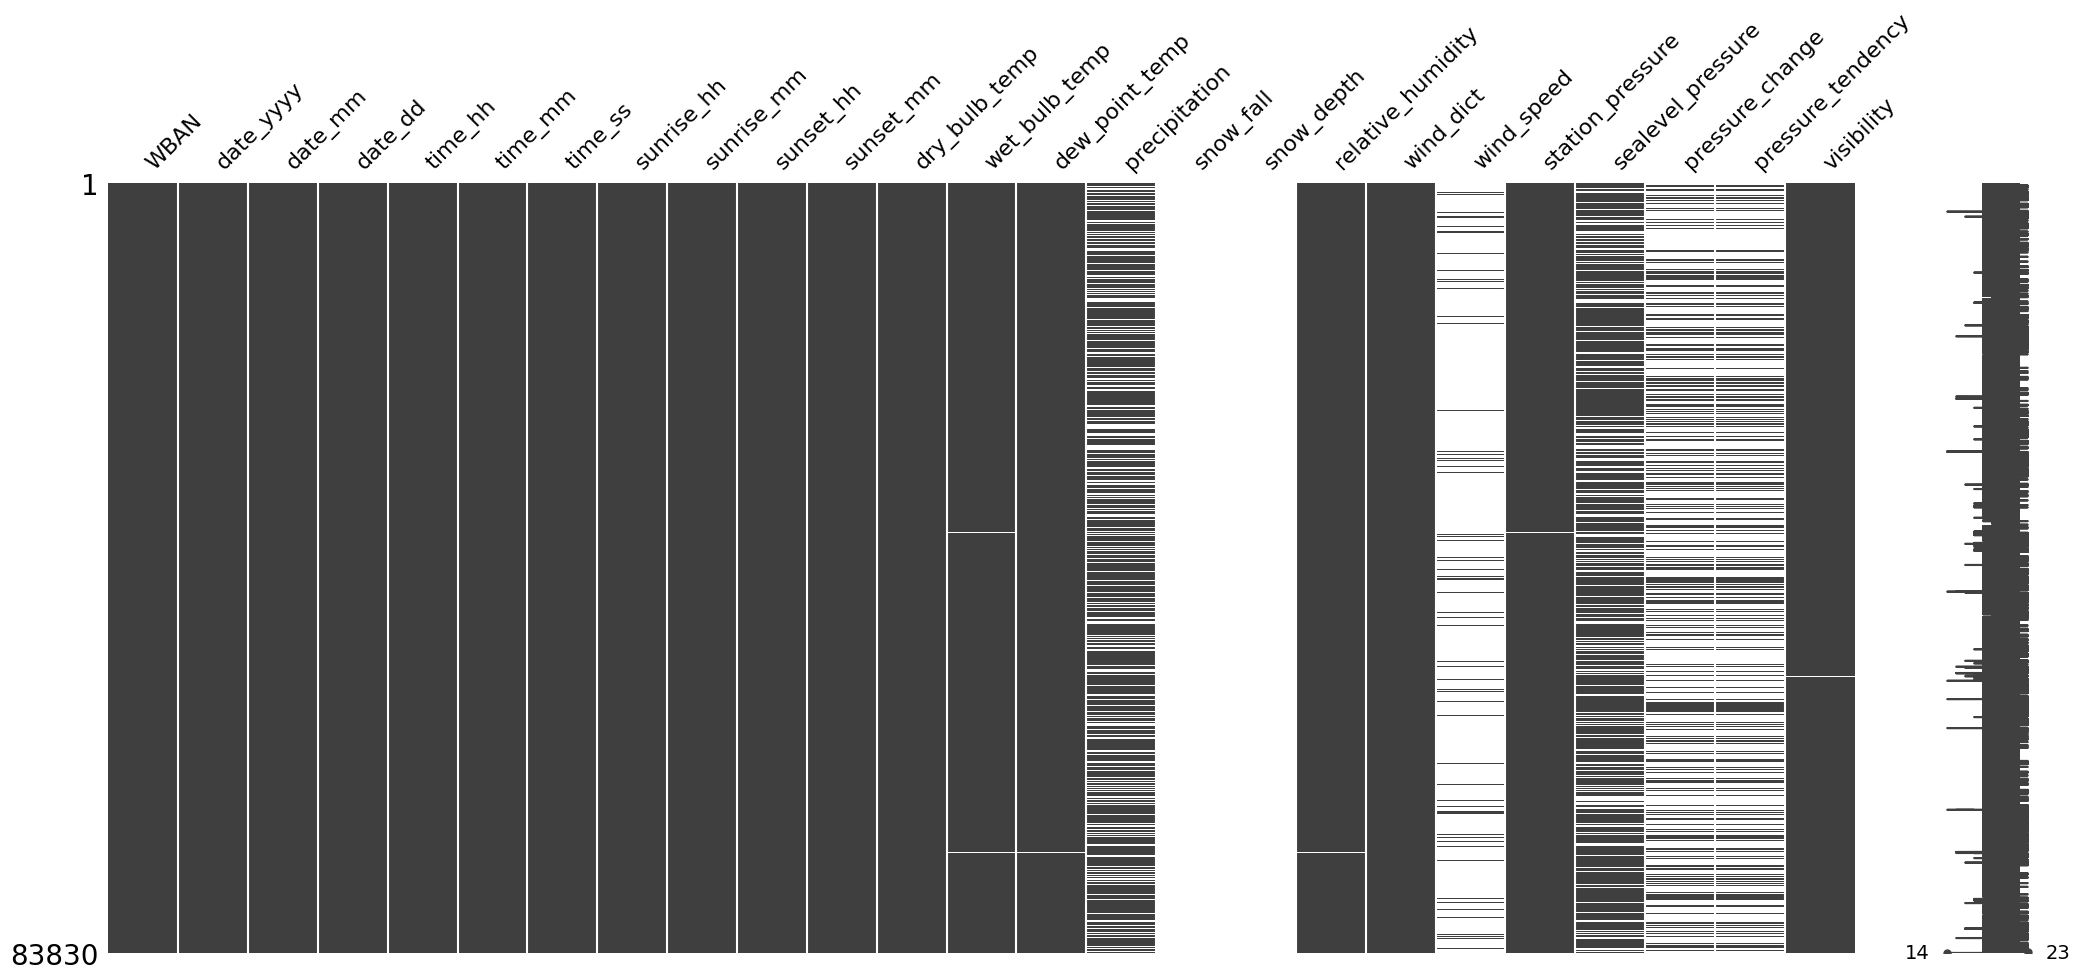

In [12]:
msno.matrix(df)

### 看一下補值前的資料基本資訊

In [13]:
df.describe().T

count          mean        std       min       25%  \
WBAN               83830.0  13865.000000   0.000000  13865.00  13865.00   
date_yyyy          83830.0   2019.593845   1.789416   2017.00   2018.00   
date_mm            83830.0      6.330872   3.526908      1.00      3.00   
date_dd            83830.0     15.665108   8.792270      1.00      8.00   
time_hh            83830.0     10.893177   6.926788      0.00      5.00   
time_mm            83830.0     45.193415  21.049302      0.00     36.00   
time_ss            83830.0      0.000000   0.000000      0.00      0.00   
sunrise_hh         83816.0      5.272001   0.741416      4.00      5.00   
sunrise_mm         83816.0     35.815250  18.025773      0.00     20.00   
sunset_hh          83816.0     17.485003   0.884077     16.00     17.00   
sunset_mm          83816.0     29.852510  19.828134      0.00      9.00   
wet_bulb_temp      83325.0     60.750459  13.649073      8.00     51.00   
snow_fall              0.0           NaN        NaN       NaN       NaN   
snow_depth             0.0           NaN        NaN       NaN       NaN   
relative_humidity  83697.0     77.337623  18.136943     14.00     67.00   
wind_dict          83830.0      0.000000   0.000000      0.00      0.00   
wind_speed          6218.0     24.379865   5.542251     14.00     21.00   
pressure_change    26555.0      0.000798   0.036665     -0.22     -0.02   
pressure_tendency  26555.0      4.636716   2.802991      0.00      3.00   
visibility         83800.0      8.812591   2.670734      0.00      9.94   

                       50%       75%       max  
WBAN               13865.0  13865.00  13865.00  
date_yyyy           2020.0   2021.00   2023.00  
date_mm                6.0      9.00     12.00  
date_dd               16.0     23.00     31.00  
time_hh               11.0     17.00     23.00  
time_mm               58.0     58.00     59.00  
time_ss                0.0      0.00      0.00  
sunrise_hh             5.0      6.00      6.00  
sunrise_mm            41.0     51.00     59.00  
sunset_hh             18.0     18.00     19.00  
sunset_mm             31.0     50.00     59.00  
wet_bulb_temp         64.0     72.00     84.00  
snow_fall              NaN       NaN       NaN  
snow_depth             NaN       NaN       NaN  
relative_humidity     84.0     90.00    100.00  
wind_dict              0.0      0.00      0.00  
wind_speed            23.0     26.00     64.00  
pressure_change        0.0      0.02      0.26  
pressure_tendency      5.0      8.00      9.00  
visibility            10.0     10.00     10.00

## 開始補值

### R_relative_humidity 大部分氣象站缺的不多 數值漂亮可直接補  但有遇到氣象站整個月都缺失 最後再以平均補上以補救

In [14]:
df.shape

(83830, 25)

In [15]:
df[['relative_humidity']] = df[['relative_humidity']].interpolate(method='nearest' , limit_direction = 'both', limit = 300 )
df[['relative_humidity']] = df[['relative_humidity']].fillna(df['relative_humidity'].mean())

In [16]:
df[['relative_humidity']].describe().T

count       mean       std   min   25%   50%   75%    max
relative_humidity  83830.0  77.327365  18.14761  14.0  67.0  84.0  90.0  100.0

In [17]:
df[['relative_humidity']].isna().sum()

relative_humidity    0
dtype: int64

### S_wind_dict

### 在上方步驟前處理中 理應已經補完 空值被視為 0

### T_wind_speed 卻失嚴重 但缺失分布算穩定 以差值法補完後 分布通常會變集中(因為已知值少 補多數缺失值)

In [18]:
df[['wind_speed']] = df[['wind_speed']].interpolate(method='nearest' ,limit_direction = 'both', limit = 1000)
df[['wind_speed']] = df[['wind_speed']].fillna(df['wind_speed'].mean())

In [19]:
df[['wind_speed']].describe().T

count       mean       std   min   25%   50%   75%   max
wind_speed  83830.0  22.053869  4.363702  14.0  20.0  21.0  24.0  64.0

In [20]:
df[['wind_speed']].isna().sum()

wind_speed    0
dtype: int64

###  V_visibility 缺失不嚴重 原是數據便高度集中 補起來也較讓人安心

In [21]:
df[['visibility']] = df[['visibility']].interpolate(method='nearest' ,limit_direction = 'both', limit = 300)
df[['visibility']] = df[['visibility']].fillna(df['visibility'].mean())

In [22]:
df[['visibility']].describe().T

count      mean       std  min   25%   50%   75%   max
visibility  83830.0  8.812481  2.670748  0.0  9.94  10.0  10.0  10.0

In [23]:
df[['visibility']].isna().sum()

visibility    0
dtype: int64

## 最後檢查補值完情形

In [24]:
df.isna().mean()

WBAN                 0.000000
date_yyyy            0.000000
date_mm              0.000000
date_dd              0.000000
time_hh              0.000000
time_mm              0.000000
time_ss              0.000000
sunrise_hh           0.000167
sunrise_mm           0.000167
sunset_hh            0.000167
sunset_mm            0.000167
dry_bulb_temp        0.001062
wet_bulb_temp        0.006024
dew_point_temp       0.001539
precipitation        0.284015
snow_fall            1.000000
snow_depth           1.000000
relative_humidity    0.000000
wind_dict            0.000000
wind_speed           0.000000
station_pressure     0.004485
sealevel_pressure    0.252463
pressure_change      0.683228
pressure_tendency    0.683228
visibility           0.000000
dtype: float64

In [25]:
df.describe().T

count          mean        std       min       25%  \
WBAN               83830.0  13865.000000   0.000000  13865.00  13865.00   
date_yyyy          83830.0   2019.593845   1.789416   2017.00   2018.00   
date_mm            83830.0      6.330872   3.526908      1.00      3.00   
date_dd            83830.0     15.665108   8.792270      1.00      8.00   
time_hh            83830.0     10.893177   6.926788      0.00      5.00   
time_mm            83830.0     45.193415  21.049302      0.00     36.00   
time_ss            83830.0      0.000000   0.000000      0.00      0.00   
sunrise_hh         83816.0      5.272001   0.741416      4.00      5.00   
sunrise_mm         83816.0     35.815250  18.025773      0.00     20.00   
sunset_hh          83816.0     17.485003   0.884077     16.00     17.00   
sunset_mm          83816.0     29.852510  19.828134      0.00      9.00   
wet_bulb_temp      83325.0     60.750459  13.649073      8.00     51.00   
snow_fall              0.0           NaN        NaN       NaN       NaN   
snow_depth             0.0           NaN        NaN       NaN       NaN   
relative_humidity  83830.0     77.327365  18.147610     14.00     67.00   
wind_dict          83830.0      0.000000   0.000000      0.00      0.00   
wind_speed         83830.0     22.053869   4.363702     14.00     20.00   
pressure_change    26555.0      0.000798   0.036665     -0.22     -0.02   
pressure_tendency  26555.0      4.636716   2.802991      0.00      3.00   
visibility         83830.0      8.812481   2.670748      0.00      9.94   

                       50%       75%       max  
WBAN               13865.0  13865.00  13865.00  
date_yyyy           2020.0   2021.00   2023.00  
date_mm                6.0      9.00     12.00  
date_dd               16.0     23.00     31.00  
time_hh               11.0     17.00     23.00  
time_mm               58.0     58.00     59.00  
time_ss                0.0      0.00      0.00  
sunrise_hh             5.0      6.00      6.00  
sunrise_mm            41.0     51.00     59.00  
sunset_hh             18.0     18.00     19.00  
sunset_mm             31.0     50.00     59.00  
wet_bulb_temp         64.0     72.00     84.00  
snow_fall              NaN       NaN       NaN  
snow_depth             NaN       NaN       NaN  
relative_humidity     84.0     90.00    100.00  
wind_dict              0.0      0.00      0.00  
wind_speed            21.0     24.00     64.00  
pressure_change        0.0      0.02      0.26  
pressure_tendency      5.0      8.00      9.00  
visibility            10.0     10.00     10.00